In [17]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

# Problem Set 4
## Monte Carlo Eksperimenter

I ugeseddel 4 skal I arbejde med et simulationsstudie, hvor I skal undersøge og sammenligne en simpel og multipel OLS estimator i et tilfælde med udeladt variabelbias. Generelt kan I bruge Monte Carlo eksperimenter til at opstille en model, hvor I kan kontrollere alle aspekter af den, undersøge egenskaber ved en estimator, f.eks. hvis MLR.1 til MLR.4 ikke er opfyldt, eller hvis I ønsker at undersøge en ny estimator eller undersøge asymptotiske resultater.

I denne ugeseddel skal I se nærmere på følgende datagenererende proces (DGP): 

\begin{align}
y_i &= \beta_0 + \beta_1 x_{1i} +\beta_2 x_{2i}+ u_i, \\
\beta_0 &= 1,\, \beta_1 = 2, \beta_2=-3, \\
x_1 &\sim N(25,25),\, u\sim U(-50,50), \, \, x_2^*\sim U(10,30) \\
x_2 &= \rho x_1 + x_2^*, \, \rho=0.5, \, n=50
\end{align}

Den datagenerende proces specificerer de sande værdier af $\beta_0$, $\beta_1$ og $\beta_2$ samt fordelingerne af $x_1$, $x_2$ og $u$. I dette tilfælde viser ligning (2) de sande parameterværdier, ligning (3) viser hvilken fordeling $x_1$, $x_2^*$ og $u$ er trukket fra, og ligning (1) viser sammenhængen imellem dem i en lineær regression. Ligning (4) viser, at $x_2$ er en lineær funktion af de stokastiske variable $x_1$ og $x_2^*$, hvor $\rho$ angiver hvor meget $x_2$ afhænger af $x_1$.

I skal undersøge og sammenligne egenskaberne for OLS estimatoren i en simpel og multipel regressionsmodel. Nedenfor er udtrykket for OLS estimatoren for $\beta_1$ i det simple tilfælde, $\widetilde{\beta}_1$, og i et tilfælde med flere forklarende variable, $\widehat{\beta}_1$.

\begin{align} \tag{5}
\widetilde{\beta }_{1}& =\frac{\sum_{i}(x_{i1}-\bar{x}_{1})(y_{i}-\bar{y})}{%
\sum_{i}(x_{i1}-\bar{x}_{1})^{2}} \\[8pt]
\widehat{\beta }& =\left( 
\begin{array}{c} \tag{6}
\widehat{\beta }_{0} \\ 
\widehat{\beta }_{1} \\ 
\widehat{\beta }_{2}%
\end{array}%
\right) =(X^{\prime }X)^{-1}X^{\prime }y
\end{align}%
hvor $X$ i ligning (6) indeholder information om $x_{1}$, $x_{2}$ og en konstant. 


## Gruppespørgsmål

**Opgave 1:** Forventer I en positiv eller negativ bias, når I estimerer en simpel model kun med $x_1$? Hvad er størrelsen på den asymptotiske bias? Beregn dette (brug pen og papir).

[Anvend følgende udtryk for asymptotisk bias, hvor $\widetilde{u}=\beta_2x_2 + u$]
\begin{align*}
p\text{lim}(\widetilde{\beta}_1)-\beta_1 = \frac{\text{Cov}(x_1,\widetilde{u})}{%
\text{Var}(x_1)}
\end{align*}


**Dit svar:**

> Vi forventer et negativt bias i en simpel model kun med $x_1$. Tag udgangspunkt i tabel 3.2 i Wooldridge. Her kan vi se, at når $\beta_2<0$ og $\text{corr}(x_1,x_2)>0$, så vil bias være negativt.  Når vi beregner størrelsen af de asymptotiske bias, tager vi udgangspunkt i ligningen i gruppespørgsmålet:
> 
> \begin{align*}
> p\text{lim}(\widetilde{\beta}_1)-\beta_1 &= \frac{cov(x_1,\widetilde{u})}{var(x_1)} = \frac{cov(x_1,\beta_2x_2+u)}{var(x_1)} = \frac{\beta_2\cdot cov(x_1,\rho x_1+x_2^*) + cov(x_1,u)}{var(x_1)} \\
> &= \frac{\beta_2\rho \cdot var(x_1) + \beta_2\cdot cov(x_1,x_2^*)}{var(x_1)} = \frac{\beta_2\rho \cdot var(x_1)}{var(x_1)} = \beta_2\rho
> \end{align*}
> 
> Hvis vi indsætter værdierne fra ligning (2) og (4) får vi, at bias vil være $\beta_2\rho = -3\cdot 0.5 = -1.5$.
> 

**Opgave 2:** Opfylder den datagenererende proces MLR.1 til MLR.4? 

**Dit svar:**

> Den datagenererende proces opfylder MLR.1-MLR.4. 
> 
> MLR.1: Lineær i parametrene er opfyldt i ligning (1). 
> 
> MLR.2: Tilfældig udvælgelse sker, når numpy trækker tilfældige tal ud fra de relevante fordelinger. 
> 
> MLR.3: Inge perfekt multikolinearitet, bemærk, at det gælder selvom $x_1$ og $x_2$ er korreleret. 
> 
> ML.4: Eksogenitet, $E(u|X)=0$, herunder er $E(u) = \frac{a+b}{2} = \frac{-50+50}{2}=0$. 
> 
> Når MLR.1-MLR.4 er opfyldt, er estimatoren middelret.
> 

**Opgave 3:** Hvordan kan et Monte Carlo-eksperiment blive brugt til at sammenligne variansen fra to forskellige middelrette estimatorer?

**Dit svar:**

> Et Monte Carlo eksperiment kan blive brugt til at sammenligne variansen fra forskellige middelrette estimatorer, fordi vi udregner de to estimatorer på samme tilfældige udtrækninger. I et sådan tilfælde vil estimatoren med den mindste varians være at foretrække.

## Python øvelser

### Opgave 1

I skal starte med at opstille Monte Carlo eksperimentet i Python. I skal udfylde den del af Python-koden, som mangler. I skal først køre Monte Carlo eksperimentet, når I har skrevet al koden ind. Der skal udfyldes manglende kode i hvert af de fire steps angivet i kommentarerne til funktionen herunder.

In [39]:
def simulate():

	## Step 1. Definer parameterværdier
	n = 50
	rho = 0.5
	beta0 = 1
	beta1 = 2
	beta2 = -3

	# Step 2. Simular data
	x1 = np.random.normal(loc=25, scale=5, size=n) # Trækker x1 fra normalfordeling
	u  = np.random.uniform(low=-50, high=50, size=n) # Trækker u fra uniformfordeling
	x2_star = np.random.uniform(low=10, high=30, size=n) # Trækker x2* fra uniformfordeling
	x2 = rho*x1 + x2_star
	y = beta0 + beta1*x1 + beta2*x2 + u

	## Step 3: Estimer SLR modellen (y ~ x1)
	X = pd.DataFrame({'x1': x1}) 
	X = sm.add_constant(X)
	SLR_model = sm.OLS(y, X)
	SLR_results = SLR_model.fit()
	beta1_SLR = SLR_results.params['x1'] # Gemmer beta1 fra SLR-estimatet

	# Step 4: Estimer MLR modellen (y ~ x1 + x2)
	X = pd.DataFrame({'x1': x1, 'x2': x2})
	X = sm.add_constant(X)
	MLR_model = sm.OLS(y, X)
	MLR_results = MLR_model.fit()
	beta1_MLR = MLR_results.params['x1'] # Gemmer beta1 fra MLR-estimatet

	return beta1_SLR, beta1_MLR


def monte_carlo(reps=1000):
	np.random.seed(0) # Sæt seed så vi får samme tilfældige resultater hver gang
	SLR_results = [] # Liste til at gemme beta1 resultater fra SLR
	MLR_results = [] # Liste til at gemme beta1 resultater fra MLR

	for rep in range(reps): # Kør simulationen "reps" antal gange
		beta1_MLR, beta1_SLR = simulate()
		SLR_results.append(beta1_MLR)
		MLR_results.append(beta1_SLR)

	results = pd.DataFrame({'beta1_SLR': SLR_results, 'beta1_MLR': MLR_results})

	return results


Kør simulationen og gem resultaterne:

In [40]:
results = monte_carlo()

### Opgave 2 
Sammenlign $\widetilde{\beta}_1$ og $\widehat{\beta}_1$. Stemmer resultaterne overens med det, som I fandt i gruppespørgsmål 1? I kan bruge `.describe()` til at se gennemsnittet og variansen af $\widetilde{\beta}_1$ og $\widehat{\beta}_1$ fra eksperimentet.

**Din kode:**

In [41]:
results.describe()

,beta1_SLR,beta1_MLR
count,1000.000000,1000.000000
mean,0.557254,2.053022
std,0.998867,0.949422
min,-2.519445,-0.955532
25%,-0.110461,1.409247
50%,0.550903,2.064756
75%,1.231652,2.677015
max,4.314772,5.022302


**Dit svar:**

> Vi får at $\widetilde{\beta}_1 \approx 0.5$ og $\hat{\beta}_1\approx 2$. Det er, hvad vi forventer ud fra gruppespørgsmål 1, om en negativ bias på $-1.5$ i den simple model kun med $x_1$.

### Opgave 3
Kør et Monte Carlo eksperiment med $n=10$ og $n=100$. Sammenlign $\widetilde{\beta}_1$ og $\widehat{\beta}_1$. Er både $\widetilde{\beta}_1$ og $\widehat{\beta}_1$ konsistente estimatorer for $\beta_1$?

**Dit svar:**

> Når $n=10$ og $n=100$ får vi approksimativt de samme estimater for $\widetilde{\beta}_1$ og $\hat{\beta}_1$ som ovenfor. Her er det i stedet interessant at se på variansen i de to simulationer. Når $n=10$ er variansen $\approx 2.5$, imens variansen er $\approx 0.65$, når $n=100$. Der er mindre variation i estimaterne, hvis der er flere observationer med i hver simulation. $\hat{\beta}_1$ er middelret i begge tilfælde, men estimaterne af $\hat{\beta}_1$ koncentreres mere om den sande værdi, når antallet af observationer øges. Flere observationer i hver simulation ændrer ikke på, at $\widetilde{\beta}_1$ fortsat ikke er middelret. Det er ikke muligt at fjerne en asymptotisk bias ved at øge antallet af observationer. 


### Opgave 4
Kør er Monte Carlo eksperiment med $\rho=1$ og $\rho=0$ (og $n = 50$). Er multikolinearitet et problem, når $\rho = 1$? Bliver den asymptotiske bias større eller mindre? Hvis den gør, hvorfor er det tilfældet? Hvilken forskel er der i variansen af $\widetilde{\beta}_1$ og $\widehat{\beta}_1$, når $\rho = 0$? Hvilken estimator vil I foretrække?

**Dit svar:**

> Når $\rho = 1$ bliver den negative bias i $\widetilde{\beta}_1$ større. Det bliver $\beta_2\rho = -3\cdot 1  = -3$. Perfekt multikolinearitet er ikke et problem, da $x_2$ forsat afhænger af $x_2^*$. Når korrelationen mellem $x_1$ og $x_2$ øges, bliver det sværere at estimere effekten af $x_1$ i en multipel regressionsmodel. Dette kan ses på den større varians af $\hat{\beta}_1$. Når $\rho=0$ forsvinder bias i $\widetilde{\beta}_1$. Variansen af $\widetilde{\beta}_1$ er større end variansen af $\hat{\beta}_1$, fordi fejlledet i den simple model indeholder $\beta_2x_2$. Derfor foretrækkes den multiple model.

### Opgave 5
Kør et Monte Carlo eksperiment med $\rho=0.5$ og $\beta_2=0$. Sammenlign $\widetilde{\beta}_1$ og $\widehat{\beta}_1$. Hvilken er estimator vil I foretrække i dette tilfælde?

**Dit svar:**

> Når $\beta_2 = 0$ forsvinder bias i $\widetilde{\beta}_1$. Modsat spørgsmål 4 er $\widetilde{\beta}_1$ den foretrukne estimator, da det aldrig bør være muligt at få en mere efficient estimator ved at inkludere irrelevante variable.


### Opgave 6
Kør det oprindelige Monte Carlo eksperiment med et andet seed-nummer. I kan f.eks. sætte seed-nummeret til det år, I er født. Hvad kan I konkludere om $\widetilde{\beta}_1$ og $\widehat{\beta}_1$ ud fra denne ændring?

**Dit svar:**

> Det ændrer intet ved estimaterne af $\widetilde{\beta}_1$ og $\hat{\beta}_1$ at ændre seed-nummeret. Dette nummer angiver kun, hvor numpy skal begynde at udtrække tilfældige tal, så de samme tilfældige tal bliver trukket hver gang.


### Ekstraopgave: 
Hvis I har mere tid tilbage, kan I lave histogrammer af  $\widetilde{\beta}_1$ og $\widehat{\beta}_1$  for hver ændring i Monte Carlo eksperimentet fra spørgsmål 2 til 6. I kan bruge koden nedenfor. Husk at gemme histogrammerne efter hver simulation, hvis I gerne vil sammenligne med det oprindelige eksperiment.

```py
import seaborn as sns
sns.histplot(results);
```

**Din kode:**

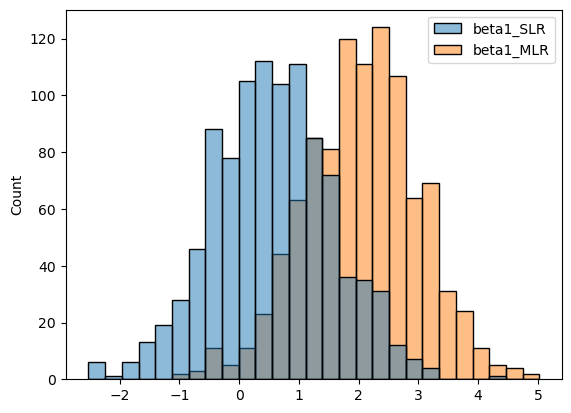

In [42]:
sns.histplot(results);